In [169]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.preprocessing import LabelEncoder

In [170]:
# We define a number of topics that we know are in the documents
zeroshot_topic_list = ["Economy", "election", "environment","israel conflict","others"]

In [171]:
!ls data

data.csv                data_w_topics.csv       news_articles_26_01.pkl


In [172]:
df=pd.read_csv("./data/data.csv")
df.head()

,title,article,keywords,source
0,"Live updates: Israel-Hamas war rages, hostages...","Bill Burns, director of the CIA, is expected t...","['expected', 'war', 'held', 'deal', 'rages', '...",CNN
1,"January 25, 2024 Israel-Hamas war","Palestinians flee Khan Younis, moving toward R...","['war', 'hamas', '25', 'sides', 'reported', 't...",CNN
2,January 25 - 2024 campaign updates,Former President Donald Trump arrives for a ca...,"['campaign', '25', 'primary', 'republican', 'n...",CNN
3,Today’s new in 10 minutes,"CNN —\n\nJanuary 26, 2024\n\nToday on CNN 10, ...","['cnn', 'yearly', 'average', 'minutes', 'today...",CNN
4,U.S. and China are working to make the busines...,"The flags of China, U.S. and the Chinese Commu...","['trade', 'foreign', 'rules', 'beijing', 'busi...",CNBC


In [173]:
# y = list(df['article']) #list of articles
docs=list(df["article"])
label_encoder = LabelEncoder()
label_encoder.fit(docs)

# # Transform the categories to numerical labels STARTING WITH 1
numerical_labels = label_encoder.transform(docs)+ 1

topics, _ = topic_model.fit_transform(docs)


In [174]:
# We fit our model using the zero-shot topics
# and we define a minimum similarity. For each document,
# if the similarity does not exceed that value, it will be used
# for clustering instead.

vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english")
representation_model = KeyBERTInspired()
embedding_model="all-MiniLM-L6-v2"

topic_model = BERTopic(
    embedding_model=embedding_model, 
    min_topic_size=5,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.95,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model
)
topics, _ = topic_model.fit_transform(docs)

In [162]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,21,-1_rents_rent_tenants_mortgage,"[rents, rent, tenants, mortgage, rental, costs...",[Average private rents in Great Britain have c...
1,0,37,0_stocks_stock_dividend_investors,"[stocks, stock, dividend, investors, investmen...",[ilbusca\n\nAll financial numbers in this arti...
2,1,20,1_emissions_pollution_epa_enforcement,"[emissions, pollution, epa, enforcement, fines...",[Scientists are starting to count the health c...
3,2,20,2_bank kenya_nairobi_kenya_financial,"[bank kenya, nairobi, kenya, financial, treasu...",[Economy Penalties for illegal State actions b...
4,3,6,3_beijing_china_taiwan_chinese,"[beijing, china, taiwan, chinese, taiwan peopl...","[The flags of China, U.S. and the Chinese Comm..."


In [163]:
topic_model.get_topic(0)

[('stocks', 0.47366676),
 ('stock', 0.46822786),
 ('dividend', 0.44935936),
 ('investors', 0.44175076),
 ('investment', 0.43116313),
 ('shares', 0.40257168),
 ('markets', 0.37172073),
 ('earnings', 0.35494325),
 ('financial', 0.35037643),
 ('market', 0.34380233)]

In [164]:
len(topic_model.get_topic_info()['Topic'])

5

In [165]:
for i in range(-1, 4):
    print(topic_model.get_topic(i))
    print("\n")

[('rents', 0.42733684), ('rent', 0.39919764), ('tenants', 0.38055277), ('mortgage', 0.3722833), ('rental', 0.34048817), ('costs', 0.3269711), ('markets', 0.30002865), ('london', 0.297673), ('insurers', 0.28724197), ('insurance', 0.28685063)]


[('stocks', 0.47366676), ('stock', 0.46822786), ('dividend', 0.44935936), ('investors', 0.44175076), ('investment', 0.43116313), ('shares', 0.40257168), ('markets', 0.37172073), ('earnings', 0.35494325), ('financial', 0.35037643), ('market', 0.34380233)]


[('emissions', 0.37750015), ('pollution', 0.32642534), ('epa', 0.31517345), ('enforcement', 0.27941823), ('fines', 0.26132423), ('investigation', 0.25681144), ('london', 0.24668208), ('superdry', 0.24616349), ('luxury', 0.23508427), ('euro parking', 0.23384154)]


[('bank kenya', 0.62862563), ('nairobi', 0.49636054), ('kenya', 0.4551239), ('financial', 0.36300415), ('treasury', 0.3510352), ('bank', 0.3394451), ('loans', 0.30163354), ('currency', 0.29780182), ('economic', 0.29189086), ('capital'

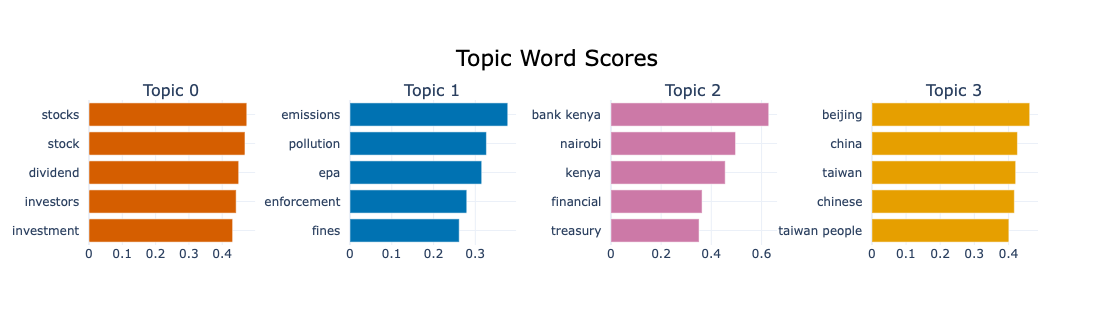

In [166]:
topic_model.visualize_barchart()

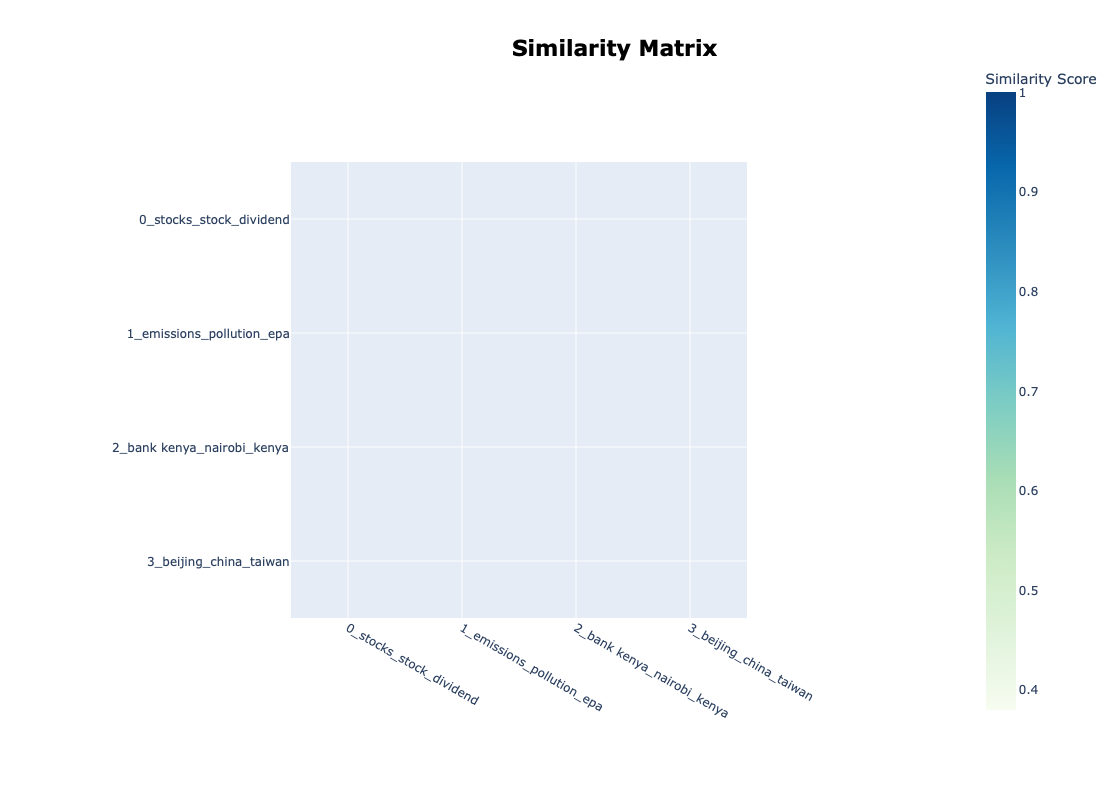

In [167]:
topic_model.visualize_heatmap()

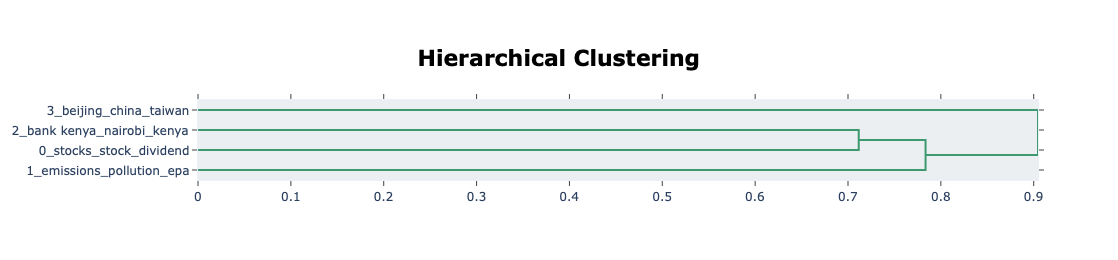

In [168]:
topic_model.visualize_hierarchy()

In [175]:
!pwd

/Users/user/Documents/repo/notebooks/notebooks/topic-modeling/BERTopic_demo-main
